# TEST TASK SOLUTION

###### By Aaron Ramirez

Analyze the following dataset and provide your summary represented by charts and written
conclusions.
Add follow-up questions if any for further/deeper analysis, and share recommendations to adjust
the process.
RAW Data
Hiring Process Steps
1. Intro Call with Recruiter
2. Test Task
3. Technical Interview
4. Client Interview
5. Signing SOW
6. Hired

Vocabulary

● TT - Test Task
● TI - Technical Interview
● CI - Client Interview

## Basic understanding & preparation

We'll start by preparing our data so we can work with it and extract all the useful information we need so we can make good business decissions based on that. For this purpose, we'll need to import certain common libraries, prepare the data and, most importantly, understand our data set so we know what we're working with.

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#File reading
file_path = '/Users/aaron/Downloads/TT RAW Data.xlsx'
df = pd.read_excel(file_path, dtype={'Candidate ID': 'str'})

In [3]:
df.head()

,Candidate ID,Test_Task_Status,Test_Task_Technology,Test_Task_Score,Test_Task_Date,Candidate_Status
0,248544000000059039,Sent;Done;Passed,Java,96.0,2021-06-02,Associated
1,248544000000059102,Sent;Done;Failed,Node,0.0,2022-02-02,Hired
2,248544000000145088,Sent;Done;Passed,Node + Angular,100.0,2021-09-12,Associated
3,248544000000146745,Sent;Done;Failed,React,6.0,2021-10-30,Associated
4,248544000000151165,Sent;Done;Passed,Scala,75.0,2021-08-23,Interviewed


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Test_Task_Score,5508.0,49.841685,35.929081,0.0,18.0,50.0,85.0,100.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5509 entries, 0 to 5508
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Candidate ID          5508 non-null   object        
 1   Test_Task_Status      5508 non-null   object        
 2   Test_Task_Technology  5508 non-null   object        
 3   Test_Task_Score       5508 non-null   float64       
 4   Test_Task_Date        5509 non-null   datetime64[ns]
 5   Candidate_Status      5508 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 258.4+ KB


In [6]:
df.shape

(5509, 6)

In [7]:
df.isnull().sum()

Candidate ID            1
Test_Task_Status        1
Test_Task_Technology    1
Test_Task_Score         1
Test_Task_Date          0
Candidate_Status        1
dtype: int64

In [8]:
#Drop the row with mainly NULL values
df = df.dropna(how='any',axis=0) 

Our main goal is to get a general insight about our data, with the previous blocks of code we can clearly see that our data set is relatively small with 5509 observations and 6 variables with 3 different data types. We can also observe that there's a single extra data entry for the 'Test_Task_Date' column (or missing values for the rest of the columns, depends on how one wants to see it!), we quickly drop the record because it doesn't add much to our research, this also ramps us up for our data cleansing proccess

In [9]:
df.nunique()

Candidate ID            5508
Test_Task_Status           2
Test_Task_Technology      38
Test_Task_Score          100
Test_Task_Date           435
Candidate_Status          54
dtype: int64

In [10]:
#Only 2 unique records for this column, might as well simplify it 
df.Test_Task_Status.unique()

array(['Sent;Done;Passed', 'Sent;Done;Failed'], dtype=object)

In [11]:
df['Test_Task_Status'] = df['Test_Task_Status'].str.split(';').str[-1]

In [12]:
#Checking if our categorical variable consist of only int type values
np.array_equal(df.Test_Task_Score, df.Test_Task_Score.astype(int))

True

In [13]:
#Changing Test_Task_Score type to int
df = df.astype({'Test_Task_Score':'int'})

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5508 entries, 0 to 5507
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Candidate ID          5508 non-null   object        
 1   Test_Task_Status      5508 non-null   object        
 2   Test_Task_Technology  5508 non-null   object        
 3   Test_Task_Score       5508 non-null   int64         
 4   Test_Task_Date        5508 non-null   datetime64[ns]
 5   Candidate_Status      5508 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 301.2+ KB


In [15]:
#Noticed there were some weird numerical values in Candidate_Status, we'll replace them with NA
df['Candidate_Status'] = df['Candidate_Status'].str.replace('\d+', ' ')
df.loc[df['Candidate_Status'] == ' ', 'Candidate_Status'] = 'NA'

/var/folders/q3/19rgddrx3zs2lvc4fk6mgdjc0000gn/T/ipykernel_31838/3296551503.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Candidate_Status'] = df['Candidate_Status'].str.replace('\d+', ' ')


In [16]:
df.nunique()

Candidate ID            5508
Test_Task_Status           2
Test_Task_Technology      38
Test_Task_Score          100
Test_Task_Date           435
Candidate_Status          52
dtype: int64

In [17]:
#Looking at our cleaned data set
df.head()

,Candidate ID,Test_Task_Status,Test_Task_Technology,Test_Task_Score,Test_Task_Date,Candidate_Status
0,248544000000059039,Passed,Java,96,2021-06-02,Associated
1,248544000000059102,Failed,Node,0,2022-02-02,Hired
2,248544000000145088,Passed,Node + Angular,100,2021-09-12,Associated
3,248544000000146745,Failed,React,6,2021-10-30,Associated
4,248544000000151165,Passed,Scala,75,2021-08-23,Interviewed


So from here we can see that our data is pretty tidy, we may be tempted to add features to this dataset, but for me it seems like the data is good to go for the exploratory analysis. With this in mind, we can move on to our analysis.

## Exploratory data analysis

We'll start by looking at our variables one at each and trying to accurately describe them (univariate analysis)

In [18]:
#Take a look at several statistics for all variables
df.describe(include='all', datetime_is_numeric=True)

,Candidate ID,Test_Task_Status,Test_Task_Technology,Test_Task_Score,Test_Task_Date,Candidate_Status
count,5508,5508,5508,5508.000000,5508,5508
unique,5508,2,38,NaN,NaN,52
top,248544000000059039,Passed,Java,NaN,NaN,No Job openings
freq,1,3897,1153,NaN,NaN,1681
mean,NaN,NaN,NaN,49.841685,2021-11-29 21:17:07.450980352,NaN
min,NaN,NaN,NaN,0.000000,2021-02-17 00:00:00,NaN
25%,NaN,NaN,NaN,18.000000,2021-08-21 00:00:00,NaN
50%,NaN,NaN,NaN,50.000000,2021-12-27 00:00:00,NaN
75%,NaN,NaN,NaN,85.000000,2022-03-16 00:00:00,NaN
max,NaN,NaN,NaN,100.000000,2022-05-10 00:00:00,NaN


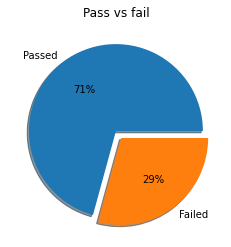

In [19]:
df['Test_Task_Status'].value_counts().plot(kind='pie', autopct='%1.f%%', explode=[0,0.1], shadow=True)
plt.ylabel("")
plt.title("Pass vs fail")
plt.show()

From this first pie chart we can quickly come to the realization that the passing rate for the test in general is pretty high, having only 29% of candidates not passing the test task. We want to dive deeper into this fact.

In [20]:
df.groupby(['Test_Task_Status']).describe()

Test_Task_Score                                          \
                           count       mean        std   min   25%   50%   
Test_Task_Status                                                           
Failed                    1611.0   5.398510   7.848177   0.0   0.0   0.0   
Passed                    3897.0  68.214267  25.393889  25.0  45.0  66.0   

                                
                    75%    max  
Test_Task_Status                
Failed             11.0   24.0  
Passed            100.0  100.0

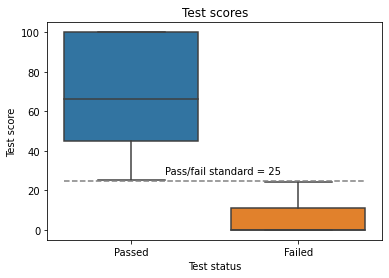

In [21]:
plt1 = sns.boxplot(x=df['Test_Task_Status'], y=df['Test_Task_Score'])
plt1.set(xlabel='Test status', ylabel='Test score')
plt1.plot([-.4, 1.4], [24.5, 24.5], color='grey', linestyle='dashed',)
plt1.text(.2, 28, 'Pass/fail standard = 25')
plt.title("Test scores")
plt.show()

We then analyze the test score, we can see that the minimum required score for an approbatory status is 25, which seems oddly low. From this, we can also see that people who fail do it badly, having 75% of the scores falling below 11 points. On the other hand, we can see that our values are spread out over a wider range for the passing scores. This should trigger some alarms about our passing methodology, we have a very low standard for passing scores and it seems like were pass everyone who puts just the bare minimum effort on the test, which can skew our results and lead to recruiting unprepared candidates

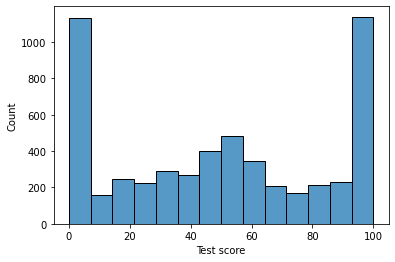

In [22]:
plt2 = sns.histplot(x=df["Test_Task_Score"])
plt2.set(xlabel='Test score')
plt.show()

Here we can see a complement for what was discussed earlier, many candidates seem to take the test and not perform even remotely well, having, most of the time, scores lower than 11.

In [23]:
# Grouping our df by technology and looking at the top 10 most taken tests
df_x = df.groupby(['Test_Task_Technology']).agg(avg_score = ('Test_Task_Score','mean'),
                                              med_score = ('Test_Task_Score','median'),
                                              top_score = ('Test_Task_Score','max'),
                                              low_score = ('Test_Task_Score','min'),
                                              tests_taken = ('Test_Task_Score','count')).round(1).reset_index()
df_x.sort_values(by=['tests_taken'],ascending=False).head(10)

,Test_Task_Technology,avg_score,med_score,top_score,low_score,tests_taken
16,Java,48.5,46.0,100,0,1153
31,React,56.5,60.0,100,0,740
26,Python,54.6,63.0,100,0,527
0,.NET,41.7,40.0,100,0,516
20,Node,54.3,60.0,100,0,323
6,Angular,44.9,45.5,100,0,288
22,Node + React,53.7,50.0,100,0,253
25,PHP,41.7,45.0,100,0,224
8,Data Engineer,42.1,32.0,100,0,195
15,Internship Test Task,70.0,85.0,100,0,190


With the previous df, we see that a pretty significant difference occurs with the number of tests taken for each unique technology, we want to visualize how the top tech test passing ratios compare.

In [24]:
#Select the previous top 10 technologies
df_x1 = df_x.sort_values(by=['tests_taken'],ascending=False).head(10)
top_tech_ls = df_x1['Test_Task_Technology'].tolist()
#Store in an ordered df
df['Test_Task_Technology_CAT'] = pd.Categorical(df['Test_Task_Technology'], 
                                                categories=top_tech_ls, ordered=True)
df_cat = df[df['Test_Task_Technology'].isin(top_tech_ls)].sort_values('Test_Task_Technology_CAT')
proportions = df_cat.groupby('Test_Task_Technology')['Test_Task_Status'].value_counts(normalize=True)

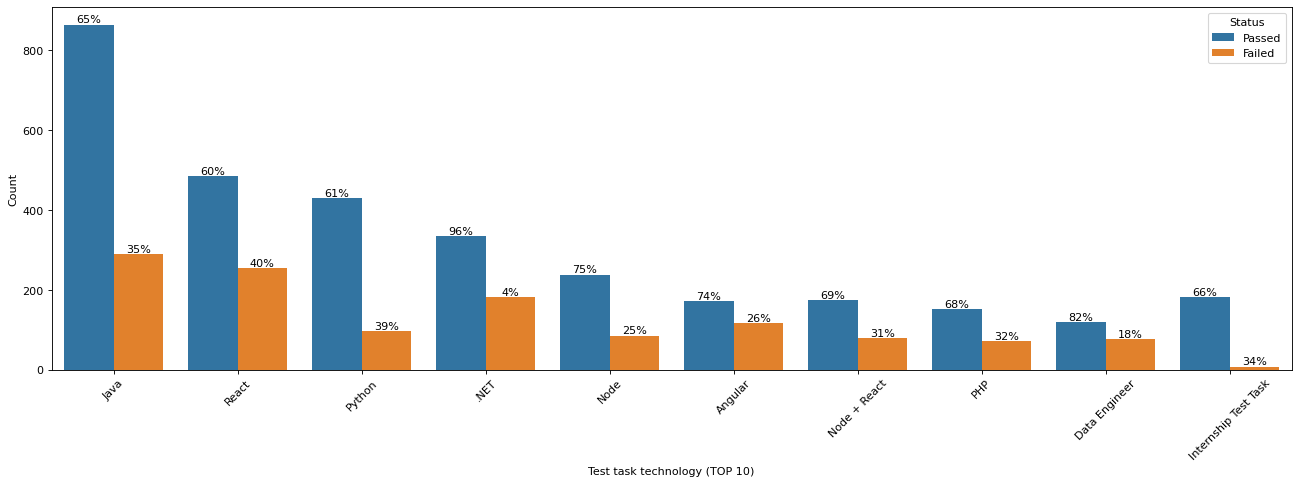

In [25]:
#Plotting the top 10 most frequent tech test and their pass/fail counts
from matplotlib.pyplot import figure
figure(figsize=(20, 6), dpi=80)
ax = sns.countplot(x="Test_Task_Technology", hue="Test_Task_Status",data=df_cat)
plt.xticks(rotation=45)
ax.set(xlabel='Test task technology (TOP 10)')
ax.set(ylabel='Count')
lbls0, lbls1 = [], []
for i in proportions[::2]:
    lbls0.append(f'{i*100:.0f}%')
for i in proportions[1::2]:
    lbls1.append(f'{i*100:.0f}%')
ax.bar_label(container=ax.containers[0], labels=lbls0)
ax.bar_label(container=ax.containers[1], labels=lbls1)
ax.legend(title='Status')
plt.show()

This gives us a pretty good undestanding of our most frequent tests. Compared to the global 71/29 passing/fail ratio, here we can see that this varies depending on the tech that's being tested. The top 3 technologies seem to behave in a similar manner, having somewhere around a 60/40 passing rate, the rest seem to behave a similar to what we saw before.

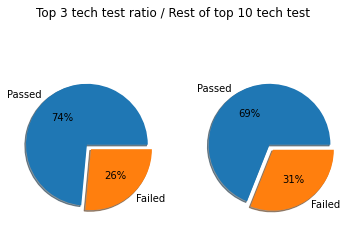

In [26]:
fig, (ax1,ax2) = plt.subplots(1,2) 
df_cat1 = df[df['Test_Task_Technology'].isin(top_tech_ls[:3])].sort_values('Test_Task_Technology_CAT')
df_cat2 = df[df['Test_Task_Technology'].isin(top_tech_ls[3:])].sort_values('Test_Task_Technology_CAT')
labels = df_cat1['Test_Task_Status'].unique()
values = df_cat1['Test_Task_Status'].value_counts()
ax1.pie(values,labels = labels, autopct='%1.f%%', explode=[0,0.1], shadow=True)
labels = df_cat2['Test_Task_Status'].unique()
values = df_cat2['Test_Task_Status'].value_counts()
ax2.pie(values,labels = labels, autopct='%1.f%%', explode=[0,0.1], shadow=True)
fig.suptitle("Top 3 tech test ratio / Rest of top 10 tech test")
plt.show()

Here we see that our passing ratios have a slight varition comparing the top 3 to the rest of the top 10 mos frequent tests.

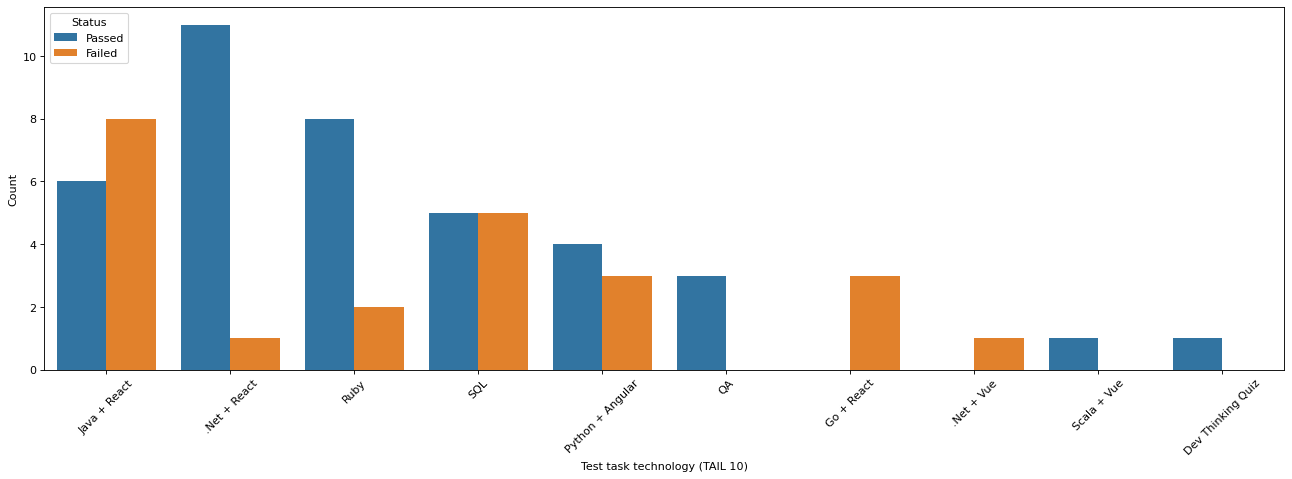

In [27]:
#What about the least frequent?
df_x2 = df_x.sort_values(by=['tests_taken'],ascending=False).tail(10)
low_tech_ls = df_x2['Test_Task_Technology'].tolist()
#Store in an ordered df (low)
df['Test_Task_Technology_CAT'] = pd.Categorical(df['Test_Task_Technology'], categories=low_tech_ls, ordered=True)
df_cat = df[df['Test_Task_Technology'].isin(low_tech_ls)].sort_values('Test_Task_Technology_CAT')
proportions = df_cat.groupby('Test_Task_Technology')['Test_Task_Status'].value_counts(normalize=True)
#Plotting the top 10 least frequent tech test and their pass/fail counts
from matplotlib.pyplot import figure
figure(figsize=(20, 6), dpi=80)
ax = sns.countplot(x="Test_Task_Technology", hue="Test_Task_Status",data=df_cat)
plt.xticks(rotation=45)
ax.set(xlabel='Test task technology (TAIL 10)')
ax.set(ylabel='Count')
ax.legend(title='Status')
plt.show()

Not much can be said for the other side of the coin. We can see that there are tests that are not being used that frequently but we can't draw precise conclusions about the passing rates due to the lack of data for these particular tech tasks

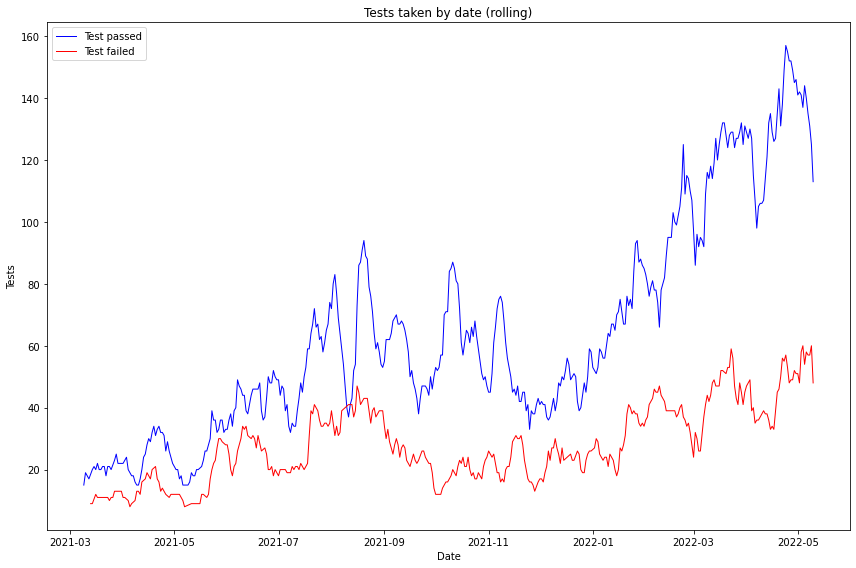

In [28]:
fig = plt.figure(figsize=(12, 8))
#Retrieve time series and smooth out data
df_tp = df.where(df.Test_Task_Status == 'Passed').groupby(['Test_Task_Date']).agg(tests_taken = ('Test_Task_Score','count')).round(1).reset_index()
df_tf = df.where(df.Test_Task_Status == 'Failed').groupby(['Test_Task_Date']).agg(tests_taken = ('Test_Task_Score','count')).round(1).reset_index()
df_tp['mov_avg'] = df_tp['tests_taken'].rolling(7).sum()
df_tf['mov_avg'] = df_tf['tests_taken'].rolling(7).sum()
#Plot
plt.plot(df_tp.Test_Task_Date, df_tp.mov_avg, color='blue', label='Test passed',linewidth=1)
plt.plot(df_tf.Test_Task_Date, df_tf.mov_avg, color='red', label='Test failed', linewidth=1)
plt.title('Tests taken by date (rolling)')
plt.xlabel('Date')
plt.ylabel('Tests')
plt.legend()
plt.tight_layout()
plt.show() 

We use the moving average of both passed and failed tests taken just to have a perspective of how our candidates were doing during this period. From the above graph, we can get an overall idea of the trend of passing and failing tests, it’s easy to see that we’ve been having more people passing the tests as time passes

In [29]:
# Grouping our df by candidate status and looking at the top 10 status (also some useful metrics)
df_y = df.groupby(['Candidate_Status']).agg(avg_score = ('Test_Task_Score','mean'),
                                              med_score = ('Test_Task_Score','median'),
                                              top_score = ('Test_Task_Score','max'),
                                              low_score = ('Test_Task_Score','min'),
                                              tests_taken = ('Test_Task_Score','count')).round(1).reset_index()

In [30]:
#Select the previous top 10 technologies
df_y1 = df_y.sort_values(by=['tests_taken'],ascending=False).head(10)
top_cansta_ls = df_y1['Candidate_Status'].tolist()
top_cansta_ls
#Store in an ordered df
df['Candidate_Status_CAT'] = pd.Categorical(df['Candidate_Status'], 
                                                categories=top_cansta_ls, ordered=True)
df_cat1 = df[df['Candidate_Status'].isin(top_cansta_ls)].sort_values('Candidate_Status_CAT')
proportions1 = df_cat1.groupby('Candidate_Status')['Test_Task_Status'].value_counts(normalize=True)

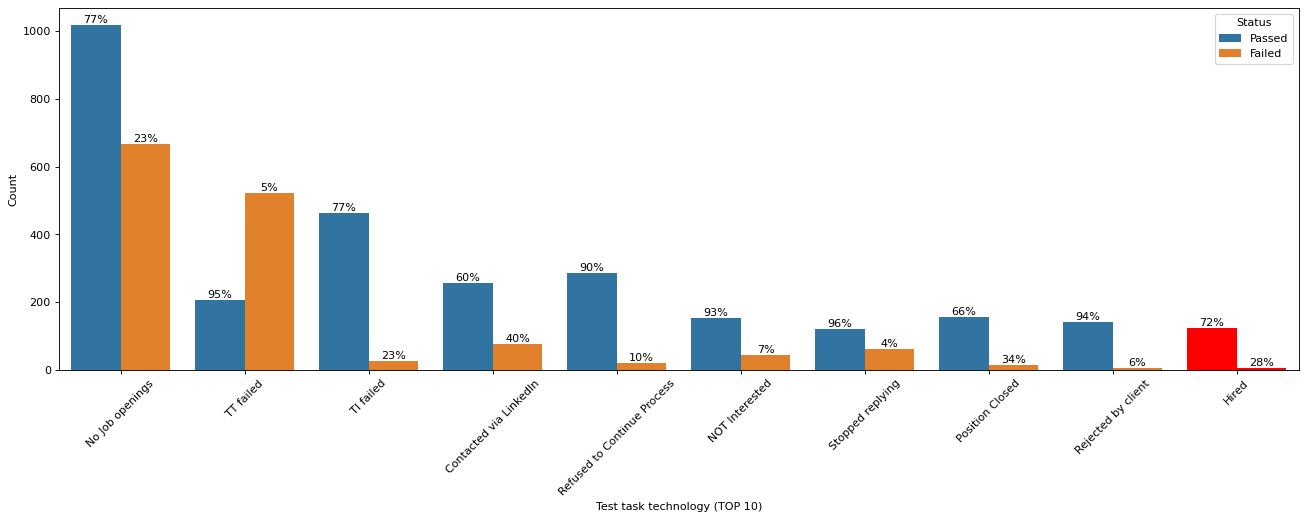

In [31]:
 #Plotting the top 10 most frequent tech test and their pass/fail counts
from matplotlib.pyplot import figure
figure(figsize=(20, 6), dpi=80)
ax = sns.countplot(x="Candidate_Status", hue="Test_Task_Status",data=df_cat1)
plt.xticks(rotation=45)
ax.set(xlabel='Test task technology (TOP 10)')
ax.set(ylabel='Count')
lbls0, lbls1 = [], []
for i in proportions1[::2]:
    lbls0.append(f'{i*100:.0f}%')
for i in proportions1[1::2]:
    lbls1.append(f'{i*100:.0f}%')
ax.bar_label(container=ax.containers[0], labels=lbls0)
ax.bar_label(container=ax.containers[1], labels=lbls1)
ax.legend(title='Status')
for p in ax.patches:
    if (8.5 <= p.get_x() < 9.5):
        p.set_facecolor('red')
plt.show()

This is an interesting finding, we can see that passing a test does not necessarily get you hired, but the most worrying part of this is that it is pretty frequent for people to pass the test and not find an opening

In [32]:
df.groupby(['Test_Task_Status']).agg(tests_taken = ('Test_Task_Score','count'))

,tests_taken
Test_Task_Status,
Failed,1611
Passed,3897


In [33]:
df.where(df.Candidate_Status == 'Hired').groupby(['Test_Task_Status']).agg(tests_taken = ('Test_Task_Score','count'))

,tests_taken
Test_Task_Status,
Failed,6
Passed,126


From the last aggregations we can see that, for the 3897 who passed the test, only 126 were hired. Although there may be people that passed and are still waiting for results, it seems like a low number, only 3% of the overall candidates were hired at the moment.



## Conclusion/Next steps



While the previous analysis tried to confront the most evident issues found within the data, there are still several things that one could do to further improve the analysis, that being said, all the previous information does give us a solid understanding of our candidates and guides us in a path in which we can improve this process.

1. Raise the bar. We currently allow people with really low scores to pass the test, this metric could be modified to ease our recruiter's workload.
2. Test Task analysis. Some of our tests are not used that often and having so many different variants may cause problems while running the hiring process, maybe simplifying here will yield better and simpler results
3. Add more detail. We still can add other rows to our data set which would help to ease the understanding of the data. With our analysis, we realized that diving deeper into the data yielded interesting results. Making these results more readily available would be optimal
4. ML algorithm. Although we’re dealing with a small data set with limited variables, it is still possible to implement a model that would help us predict how a certain candidate will perform using our existing data as a reference and using this new information as a helping guide to our recruitment team.

Overall, we understood the meaning of our data and exploited our variables to get to know their importance. It is then good practice to discuss findings and generate business decisions with them.


## Unused/Extra analysis

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.061569,951.542863,-62765.279259,inf,0.181373,5.042406e-159


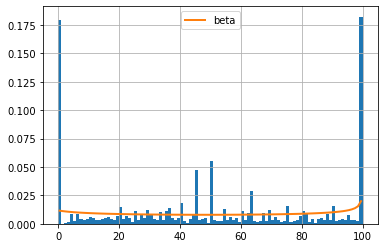

In [34]:
# Trying to fit our numerical data to a distrbution since it vaguely resembled a beta function
from fitter import Fitter, get_common_distributions, get_distributions
score = df["Test_Task_Score"].values

f = Fitter(score,distributions=["beta"])
f.fit()
f.summary()

In [35]:
f.fitted_param["beta"]

(0.7523703384377081,
 0.7663982131455811,
 -5.930620274272936,
 105.93062027427295)